In [199]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly"
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')

In [200]:
df20=pd.read_csv('data/2020-28thJuly_7cities.csv')
df19=pd.read_csv('data/2019ind.csv')
df20.head(5)

,Date,Country,City,Specie,count,min,max,median,variance
0,30/12/2019,IN,Bengaluru,co,232,1.6,28.6,8.6,228.74
1,31/12/2019,IN,Bengaluru,co,217,0.4,29.7,8.9,287.50
2,01/01/2020,IN,Bengaluru,co,180,1.2,40.2,9.8,246.08
3,02/01/2020,IN,Bengaluru,co,192,0.2,60.3,9.3,570.86
4,03/01/2020,IN,Bengaluru,co,237,0.7,86.4,8.0,523.38


In [201]:
city=['Bengaluru', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']
df19=df19[df19['City'].isin(city)]
df20=df20[df20['City'].isin(city)]
print('19:',df19.City.unique())
print('20:',df20.City.unique())
print('19:',df19.Specie.unique())
print('20:',df20.Specie.unique())
#df19.Specie.value_counts()

19: ['Bengaluru' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']
20: ['Bengaluru' 'Chennai' 'Delhi' 'Kolkata' 'Mumbai']
19: ['co' 'dew' 'humidity' 'no2' 'o3' 'pm10' 'pm25' 'precipitation' 'pressure'
 'so2' 'temperature' 'wd' 'wind gust' 'wind speed' 'wind-gust'
 'wind-speed']
20: ['co' 'dew' 'humidity' 'no2' 'o3' 'pm10' 'pm25' 'pressure' 'so2'
 'temperature']


Create single df for both years

In [202]:
df = pd.concat([df19,df20])
df

,Date,Country,City,Specie,count,min,max,median,variance
0,01/01/2019,IN,Bengaluru,co,218,1.2,36.0,7.7,261.60
1,02/01/2019,IN,Bengaluru,co,217,0.9,35.9,7.0,405.96
2,03/01/2019,IN,Bengaluru,co,217,0.2,33.2,6.7,317.93
3,04/01/2019,IN,Bengaluru,co,206,0.1,36.0,7.8,369.57
4,05/01/2019,IN,Bengaluru,co,196,0.3,37.0,7.8,270.74
...,...,...,...,...,...,...,...,...,...
14040,24/07/2020,IN,Mumbai,temperature,260,22.3,30.6,28.0,18.91
14041,25/07/2020,IN,Mumbai,temperature,223,27.0,31.5,28.5,18.84
14042,26/07/2020,IN,Mumbai,temperature,218,25.6,31.5,28.0,20.34
14043,27/07/2020,IN,Mumbai,temperature,232,22.3,29.0,27.0,15.50


Make sure dates are correct

In [203]:
#factor=['dew','humidity','pressure','temperature']
#df=df[df['Specie'].isin(factor)]
df.Date=pd.to_datetime(df.Date, format = '%d/%m/%Y')
df

,Date,Country,City,Specie,count,min,max,median,variance
0,2019-01-01,IN,Bengaluru,co,218,1.2,36.0,7.7,261.60
1,2019-01-02,IN,Bengaluru,co,217,0.9,35.9,7.0,405.96
2,2019-01-03,IN,Bengaluru,co,217,0.2,33.2,6.7,317.93
3,2019-01-04,IN,Bengaluru,co,206,0.1,36.0,7.8,369.57
4,2019-01-05,IN,Bengaluru,co,196,0.3,37.0,7.8,270.74
...,...,...,...,...,...,...,...,...,...
14040,2020-07-24,IN,Mumbai,temperature,260,22.3,30.6,28.0,18.91
14041,2020-07-25,IN,Mumbai,temperature,223,27.0,31.5,28.5,18.84
14042,2020-07-26,IN,Mumbai,temperature,218,25.6,31.5,28.0,20.34
14043,2020-07-27,IN,Mumbai,temperature,232,22.3,29.0,27.0,15.50


In [204]:
df_temp=df[df['Specie'].isin(['temperature'])]
df_dew=df[df['Specie'].isin(['dew'])]
df_hum=df[df['Specie'].isin(['humidity'])]
df25 = df[df['Specie'].isin(['pm25'])]
dfno2= df[df['Specie'].isin(['no2'])]
dfso2= df[df['Specie'].isin(['so2'])]

In [205]:
df_temp_25=df_temp.merge(df25,on=['City','Date','Country'])
df_dew_25=df_dew.merge(df25,on=['City','Date','Country'])
d_hum_25=df_hum.merge(df25,on=['City','Date','Country'])

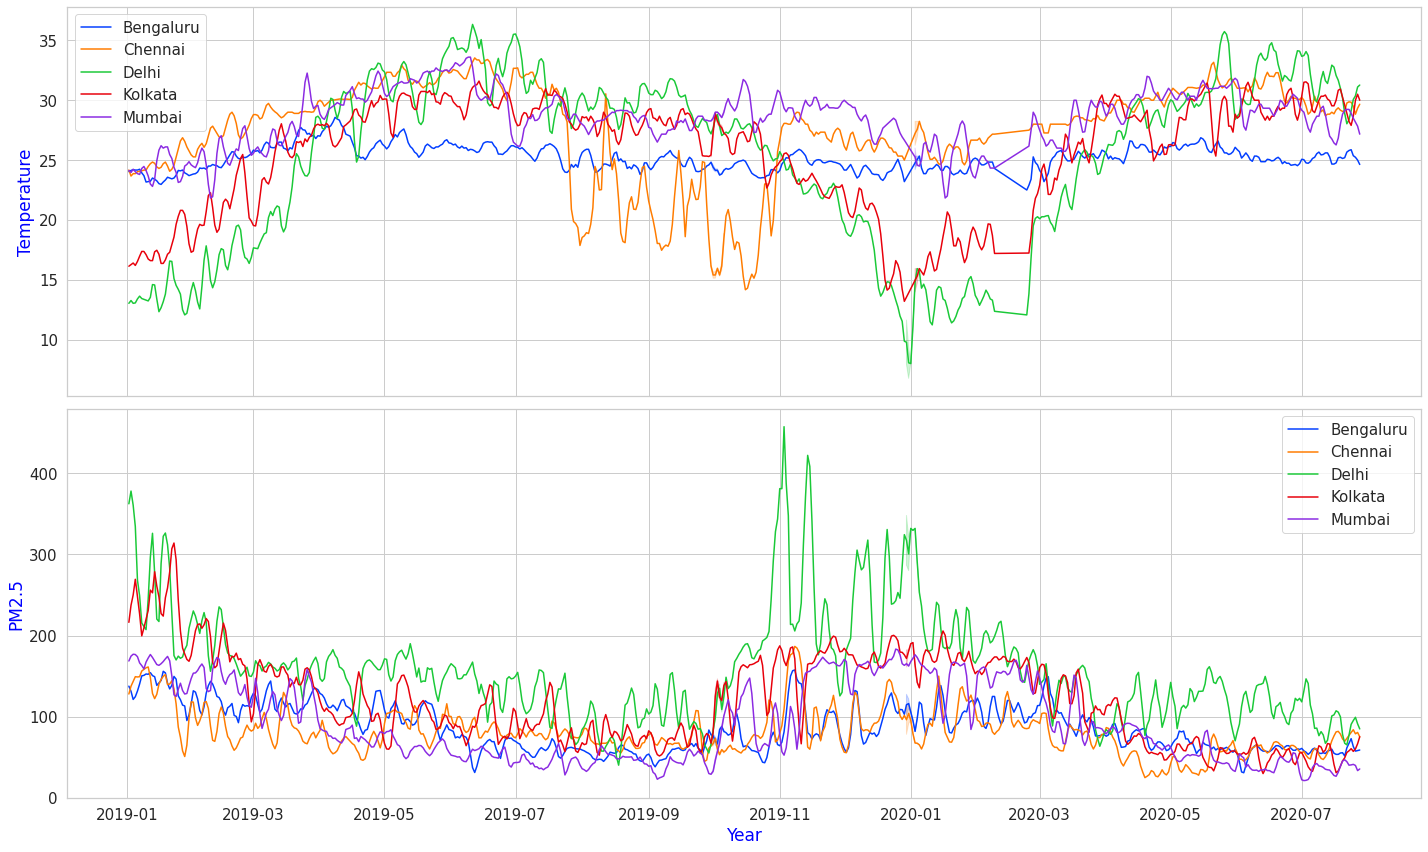

In [258]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,12),sharex=True)
for i in city:
    dff = df_temp[df_temp['City'].isin([i])]
    dft = df25[df25['City'].isin([i])]
    df_temp_roll = dff.rolling(window = 3, on= 'Date').mean()
    df25_roll = dft.rolling(window = 3, on= 'Date').mean()
    sns.lineplot(df_temp_roll.Date,df_temp_roll['median'],ax=ax1,label=i)
    sns.lineplot(df25_roll.Date,df25_roll['median'],ax=ax2,label=i)

#sns.lineplot(df_temp['Date'],df_temp['median'],hue=df_temp['City'],ax=ax1)
#sns.lineplot(df25['Date'],df25['median'],hue=df25['City'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.set_title('PM2.5',fontsize=20, c='blue')
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('PM2.5', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax1.legend(fontsize=15,frameon=True)
ax2.legend(fontsize=15,frameon=True)
plt.show()
fig.savefig(f'images/temp_all_pm25.png',bbox_inches='tight')

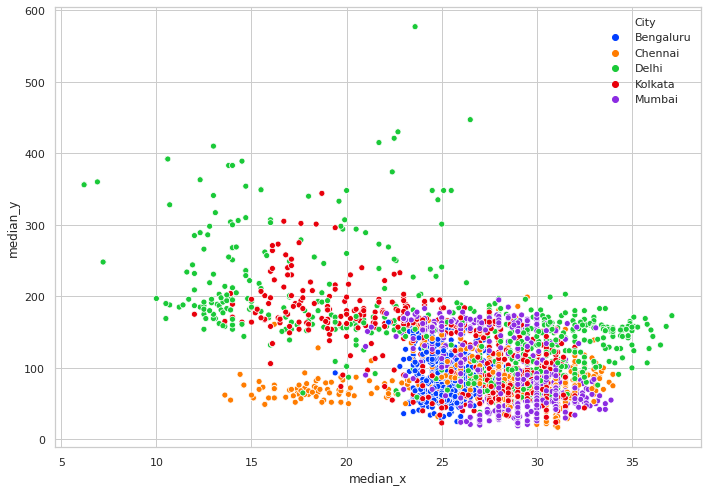

In [207]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(df_temp_25['median_x'],df_temp_25['median_y'],hue=df_temp_25['City'])
plt.tight_layout()
plt.show()

In [208]:
df_temp_no2=df_temp.merge(dfno2,on=['City','Date','Country'])
df_dew_no2=df_dew.merge(dfno2,on=['City','Date','Country'])
d_hum_no2=df_hum.merge(dfno2,on=['City','Date','Country'])

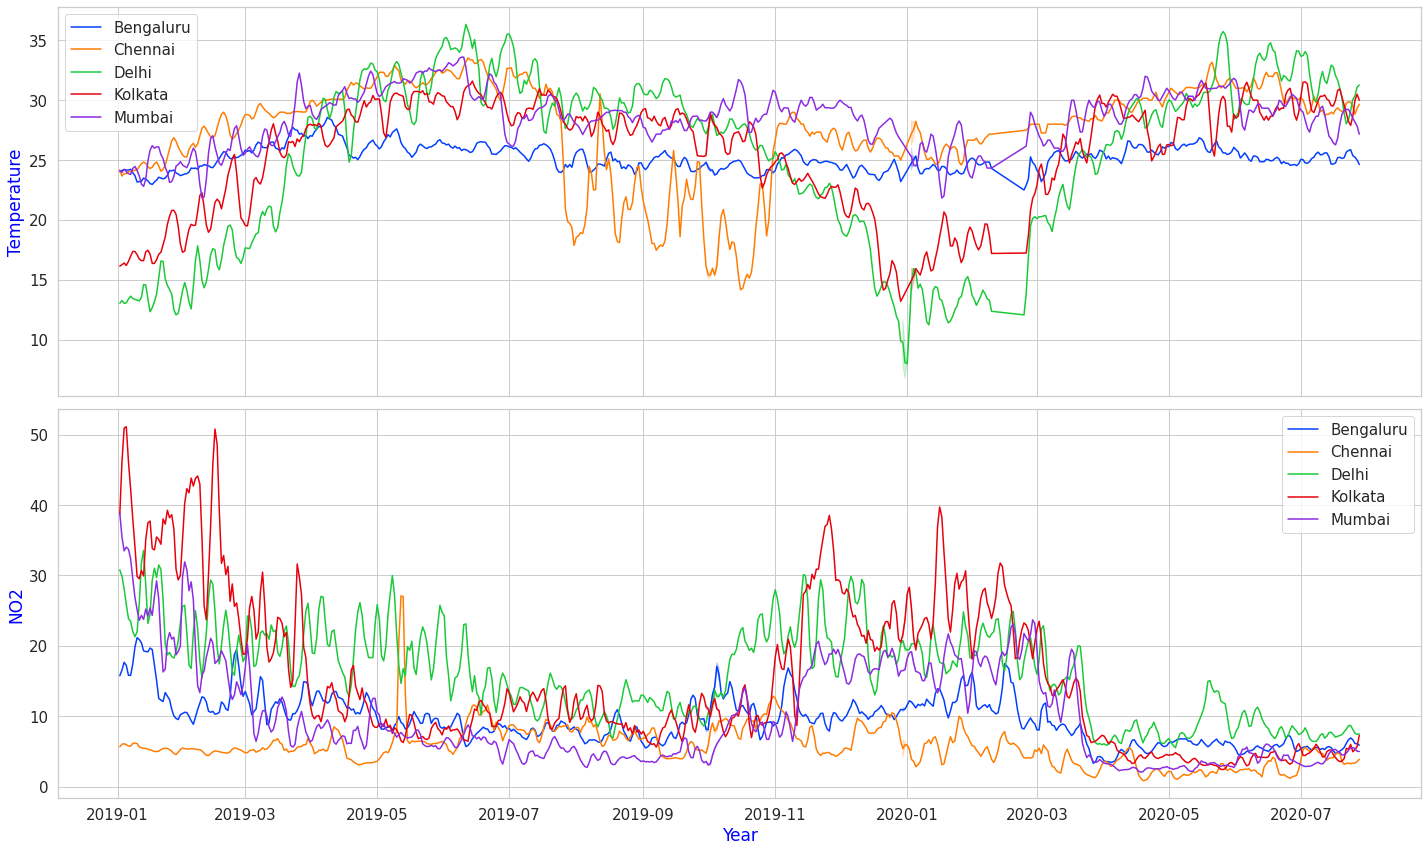

In [262]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,12),sharex=True)
for i in city:
    dff = df_temp[df_temp['City'].isin([i])]
    dft = dfno2[dfno2['City'].isin([i])]
    df_temp_roll = dff.rolling(window = 3, on= 'Date').mean()
    dfno2_roll = dft.rolling(window = 3, on= 'Date').mean()
    sns.lineplot(df_temp_roll.Date,df_temp_roll['median'],ax=ax1,label=i)
    sns.lineplot(dfno2_roll.Date,dfno2_roll['median'],ax=ax2,label=i)
#sns.lineplot(df_temp['Date'],df_temp['median'],hue=df_temp['City'],ax=ax1)
#sns.lineplot(dfno2['Date'],dfno2['median'],hue=dfno2['City'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.set_title('PM2.5',fontsize=20, c='blue')
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('NO2', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(fontsize=15,frameon=True)
ax2.legend(fontsize=15,frameon=True)
plt.tight_layout()
plt.show()
fig.savefig(f'images/temp_all_no2.png',bbox_inches='tight')

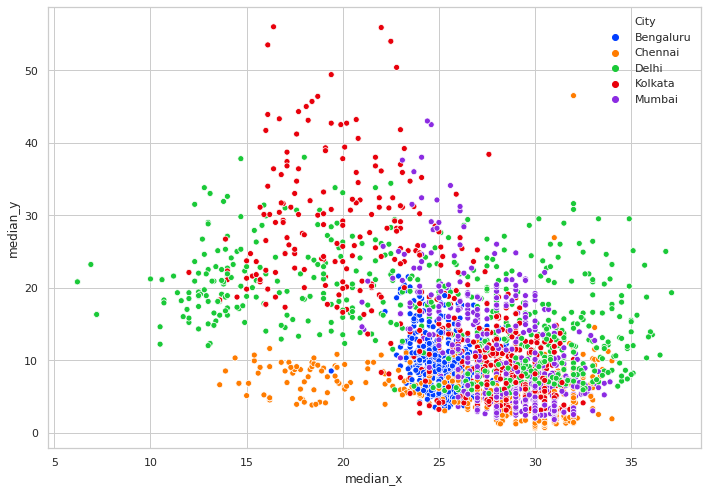

In [210]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(df_temp_no2['median_x'],df_temp_no2['median_y'],hue=df_temp_no2['City'])
plt.tight_layout()
plt.show()

In [211]:
df_temp_so2=df_temp.merge(dfso2,on=['City','Date','Country'])
df_dew_so2=df_dew.merge(dfso2,on=['City','Date','Country'])
df_hum_so2=df_hum.merge(dfso2,on=['City','Date','Country'])
dfno2

,Date,Country,City,Specie,count,min,max,median,variance
21857,2018-12-31,IN,Bengaluru,no2,216,3.0,54.9,16.1,1266.32
21858,2019-01-01,IN,Bengaluru,no2,234,4.1,57.6,14.4,1100.85
21859,2019-01-02,IN,Bengaluru,no2,224,3.5,46.7,16.8,1051.47
21860,2019-01-03,IN,Bengaluru,no2,228,4.7,69.5,18.5,1703.48
21861,2019-01-04,IN,Bengaluru,no2,214,4.7,51.6,17.7,1118.09
...,...,...,...,...,...,...,...,...,...
5443,2020-07-24,IN,Mumbai,no2,193,0.1,25.8,5.9,212.84
5444,2020-07-25,IN,Mumbai,no2,190,0.1,15.2,5.4,97.23
5445,2020-07-26,IN,Mumbai,no2,183,0.1,28.4,4.9,206.67
5446,2020-07-27,IN,Mumbai,no2,205,0.1,19.5,4.8,111.68


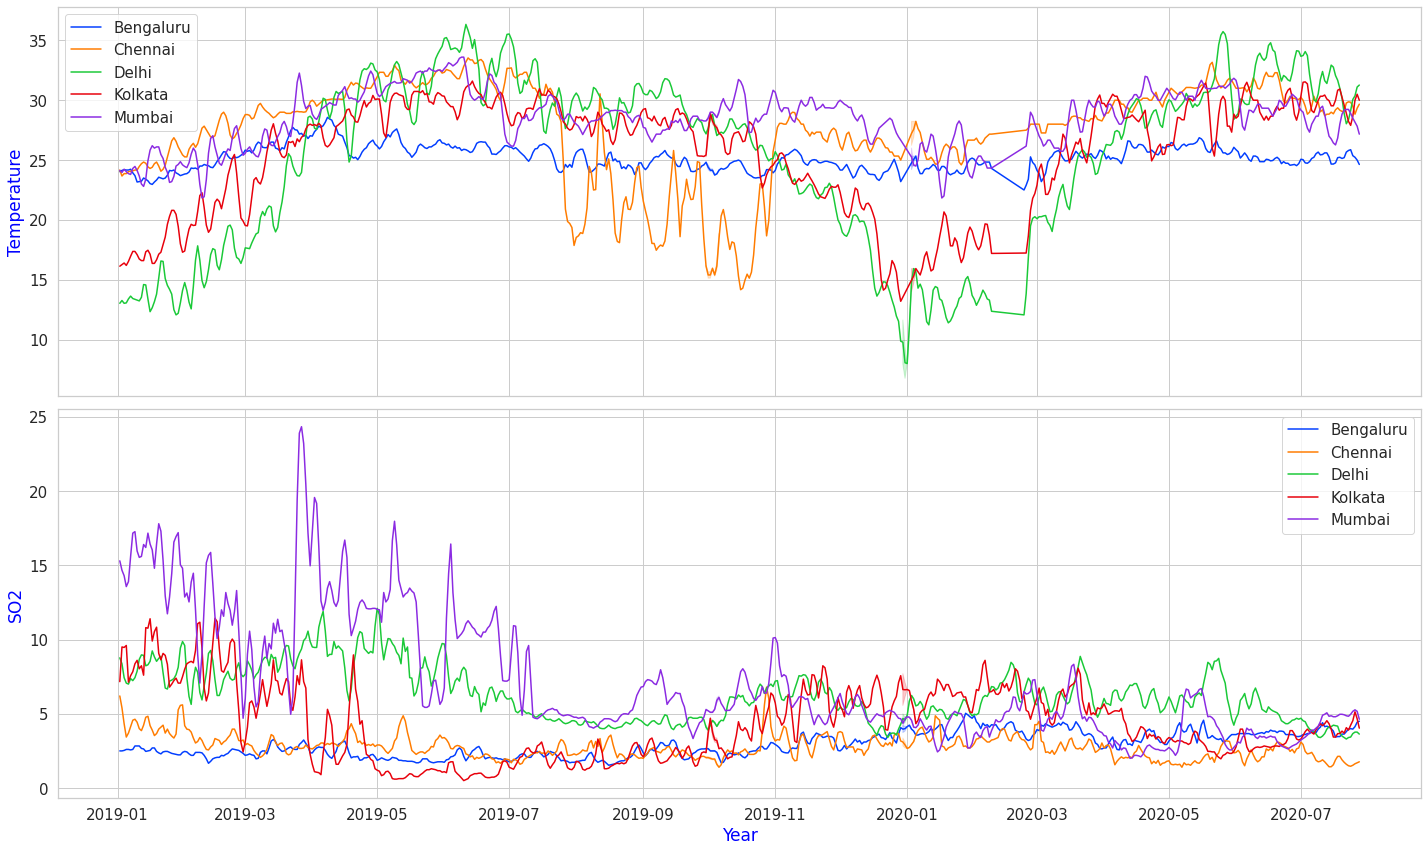

In [263]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(20,12),sharex=True)
for i in city:
    dff = df_temp[df_temp['City'].isin([i])]
    dft = dfso2[dfso2['City'].isin([i])]
    df_temp_roll = dff.rolling(window = 3, on= 'Date').mean()
    dfso2_roll = dft.rolling(window = 3, on= 'Date').mean()
    sns.lineplot(df_temp_roll.Date,df_temp_roll['median'],ax=ax1,label=i)
    sns.lineplot(dfso2_roll.Date,dfso2_roll['median'],ax=ax2,label=i)
#sns.lineplot(df_temp['Date'],df_temp['median'],hue=df_temp['City'],ax=ax1)
#sns.lineplot(dfso2['Date'],dfso2['median'],hue=dfso2['City'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
#ax1.set_title('PM2.5',fontsize=20, c='blue')
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('SO2', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
ax1.legend(fontsize=15,frameon=True)
ax2.legend(fontsize=15,frameon=True)
plt.show()
fig.savefig(f'images/temp_all_so2.png',bbox_inches='tight')

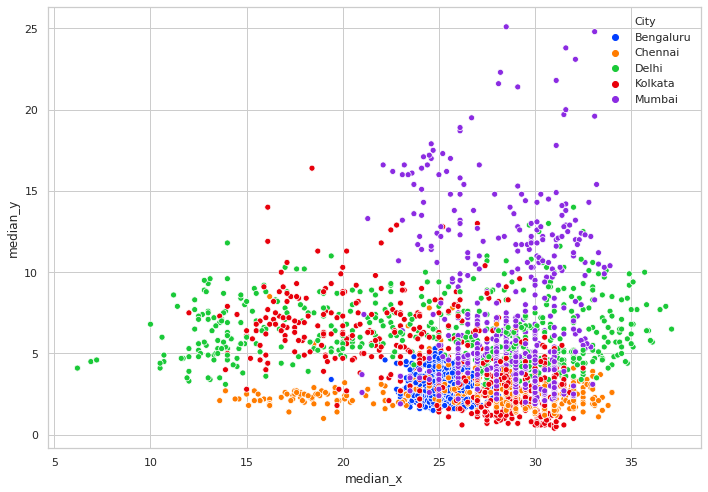

In [213]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
sns.scatterplot(df_temp_so2['median_x'],df_temp_so2['median_y'],hue=df_temp_so2['City'])
plt.tight_layout()
plt.show()

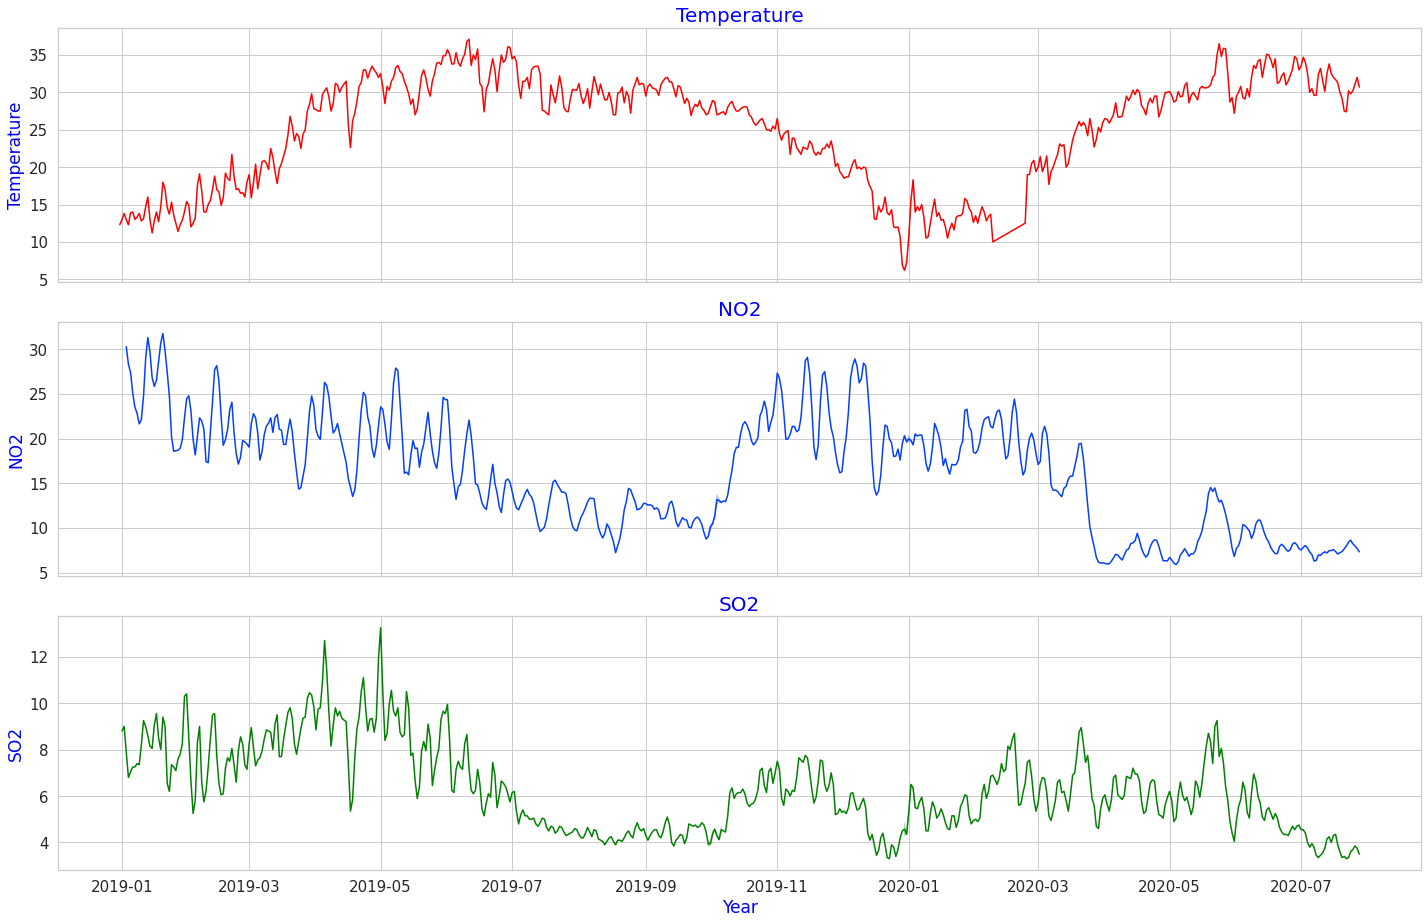

nan

In [266]:
df_temp_delhi=df_temp[df_temp['City'].isin(['Delhi'])]
dfso2_delhi = dfso2[dfso2['City'].isin(['Delhi'])]
dfno2_delhi = dfno2[dfno2['City'].isin(['Delhi'])]
df_temp_delhi_roll = df_temp_delhi.rolling(window=4,on='Date').mean()
dfso2_delhi_roll = dfso2_delhi.rolling(window=2, on='Date').mean()
dfno2_delhi_roll = dfno2_delhi.rolling(window=4, on='Date').mean()
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,13),sharex=True)
sns.lineplot(df_temp_delhi['Date'],df_temp_delhi['median'],ax=ax1,color='red')
sns.lineplot(dfso2_delhi_roll['Date'],dfso2_delhi_roll['median'],ax=ax3,color='green')
sns.lineplot(dfno2_delhi_roll['Date'],dfno2_delhi_roll['median'],ax=ax2)
ax1.set_xlabel('Year', fontsize=17,c='blue')
ax1.set_ylabel('Temperature', fontsize=17,c='blue')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('Year', fontsize=17,c='blue')
ax2.set_ylabel('NO2', fontsize=17,c='blue')
ax2.tick_params(axis='both', which='major', labelsize=15)
ax3.set_xlabel('Year', fontsize=17,c='blue')
ax3.set_ylabel('SO2', fontsize=17,c='blue')
ax3.tick_params(axis='both', which='major', labelsize=15)
ax1.set_title('Temperature',fontsize=20, c='blue')
ax2.set_title('NO2',fontsize=20, c='blue')
ax3.set_title('SO2',fontsize=20, c='blue')
plt.tight_layout()
plt.show()
df_temp_delhi_roll
fig.savefig(f'images/temp_delhi_no2_so2.png',bbox_inches='tight')
df_temp_delhi['median'].corr(dfso2_delhi['median'])

In [282]:
no2=[]
so2=[]
pm25=[]
for i in city:
    dfcity = df[df['City'].isin([i])]
    dfcity = dfcity.drop_duplicates()
    dfcityp = dfcity.pivot(index='Date',columns='Specie',values='median')
    no2.append(dfcityp['temperature'].corr(dfcityp['no2']))
    so2.append(dfcityp['temperature'].corr(dfcityp['so2']))
    pm25.append(dfcityp['temperature'].corr(dfcityp['pm25']))
dt = list(zip(city,no2,so2,pm25))
corr=pd.DataFrame(dt, columns=['City','NO2','SO2','PM2.5'])
cm = sns.light_palette("green", as_cmap=True)

s = corr.style.background_gradient(cmap='viridis')
s

,City,NO2,SO2,PM2.5
0,Bengaluru,-0.204679,-0.133644,-0.024886
1,Chennai,-0.219785,-0.111693,-0.107653
2,Delhi,-0.473253,-0.034795,-0.528701
3,Kolkata,-0.756631,-0.634203,-0.711492
4,Mumbai,-0.536066,-0.047804,-0.418386


In [273]:
df_delhid['temperature'].corr(df_delhid['no2'])
df_delhid['temperature'].corr(df_delhid['pm25'])

-0.5287005072837452

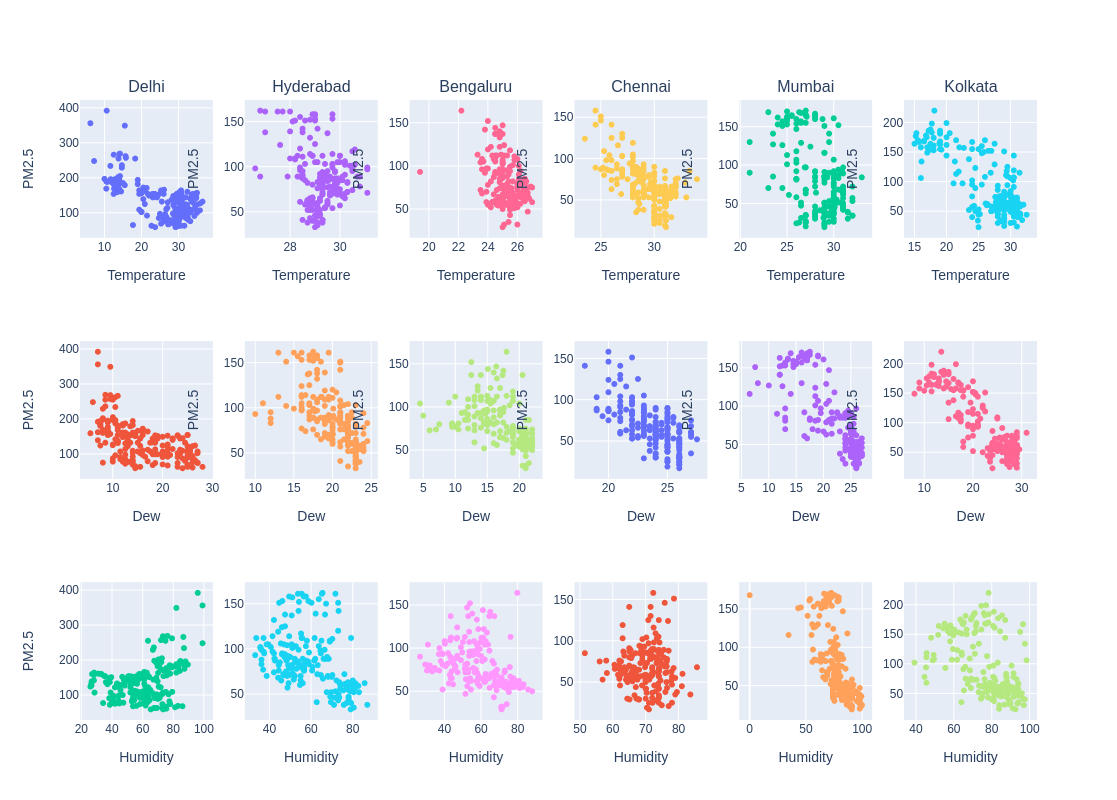

In [66]:
dfenv=df[df['Specie'].isin(['humidity','dew','temperature'])]
city=['Delhi','Hyderabad','Bengaluru','Chennai','Mumbai','Kolkata']
fig = make_subplots(
rows=3, cols=6,
subplot_titles=("Delhi", "Hyderabad", "Bengaluru", "Chennai",'Mumbai','Kolkata'))
for l,i in enumerate(city):
    qw=dd[dd['City'].isin([i])]
    qe=d[d['City'].isin([i])]
    qr=d1[d1['City'].isin([i])]
    fig.add_trace(go.Scatter(x=qw['median_x'],y=qw['median_y'],mode='markers'),row=1,col=l+1)
    fig.update_xaxes(title_text="Temperature", row=1, col=l+1)
    fig.update_yaxes(title_text="PM2.5", row=1, col=l+1)
    fig.add_trace(go.Scatter(x=qe['median_x'],y=qe['median_y'],mode='markers'),row=2,col=l+1)
    fig.update_xaxes(title_text="Dew", row=2, col=l+1)
    fig.update_yaxes(title_text="PM2.5", row=2, col=l+1)
    fig.add_trace(go.Scatter(x=qr['median_x'],y=qr['median_y'],mode='markers'),row=3,col=l+1)
    fig.update_xaxes(title_text="Humidity", row=3, col=l+1)
    fig.update_yaxes(title_text="PM2.5", row=3, col=1)
fig.update_layout(height=800, width=2000,showlegend=False)
fig.show()
fig.write_image(f'images/pm2.5_env.png')